# Binary classification 

In [228]:
# https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/

# Problem Statement
# Hypothesis Generation
# Getting the system ready and loading the data
# Understanding the data
# Exploratory Data Analysis (EDA)
# Univariate Analysis
# Bivariate Analysis
# Missing value and outlier treatment
# Evaluation Metrics for classification problems
# Model Building : 
# Logistic Regression using stratified k-folds cross validation
# Feature Engineering
# Model Building 
# Logistic Regression
# Decision tree
# Random Forest
# XGBoost

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [88]:
pwd

'/home/v-rishabh.gupta/Rishabh Gupta/Analytics Vidhya/Loan Prediction Practice Problem (Using Python)'

In [89]:
os.listdir()

['logistic.csv',
 '.ipynb_checkpoints',
 'Loan Prediction .ipynb',
 'sample_submission_S7jWYrJ.csv',
 'test.csv',
 'train.csv']

In [90]:
# read the files
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [91]:
# create the copy of the train and test data set, if 
# in future we will do any edit / change in train and test so it will not affect the orginial file.

In [92]:
train_1 = train.copy()
test_1 = test.copy()

In [93]:
train_1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [94]:
test_1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [95]:
# only columns
train_1.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [96]:
test_1.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [97]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Object : Variables are categorical. Ex: Gender, Married,Loan Id
 
int64: Integer variables like as ApplicantIncome
 
float64: variable which have some decimal values involved

In [98]:
train.shape,test.shape

((614, 13), (367, 12))

#  Univariate analysis: Analysis of each and every variable individually

In [99]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [100]:
# Normalize can be set to True to print proportions instead of number  
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

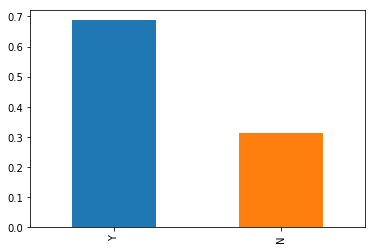

In [101]:
# if you want to show proportion by graph
train["Loan_Status"].value_counts(True).plot.bar()
plt.show()

In [102]:
train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [103]:
train['Gender'].value_counts(normalize = True)

Male      0.813644
Female    0.186356
Name: Gender, dtype: float64

In [104]:
train['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [105]:
train['Married'].value_counts(normalize=True)

Yes    0.651391
No     0.348609
Name: Married, dtype: float64

In [106]:
train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [107]:
train['Dependents'].value_counts(True)

0     0.575960
1     0.170284
2     0.168614
3+    0.085142
Name: Dependents, dtype: float64

In [108]:
train['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [109]:
train['Education'].value_counts(True)

Graduate        0.781759
Not Graduate    0.218241
Name: Education, dtype: float64

In [110]:
train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [111]:
train['Self_Employed'].value_counts(True)

No     0.859107
Yes    0.140893
Name: Self_Employed, dtype: float64

In [112]:
train['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [113]:
train['Property_Area'].value_counts(True)

Semiurban    0.379479
Urban        0.328990
Rural        0.291531
Name: Property_Area, dtype: float64

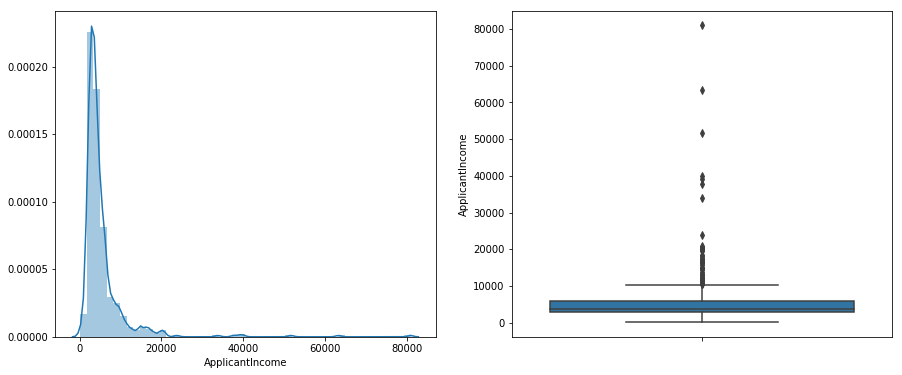

In [114]:
plt.figure(figsize=(15,6))
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.subplot(122)
sns.boxplot(y=train['ApplicantIncome'])
plt.show()

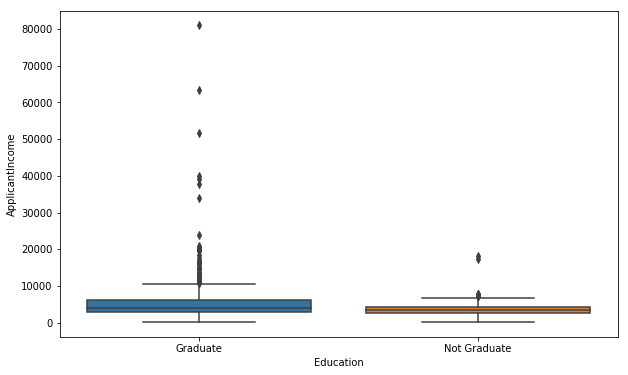

In [115]:
# Application income wrt to educaton
plt.figure(figsize=(10,6))
sns.boxplot(y=train["ApplicantIncome"],x= train["Education"] )
plt.show()

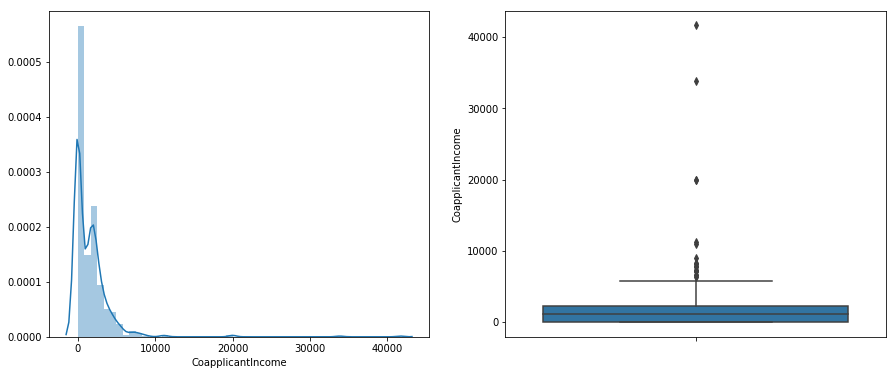

In [116]:
plt.figure(figsize=(15,6))
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122)
sns.boxplot(y=train['CoapplicantIncome'])
plt.show()

In [117]:
#removing missing / nan values
train_2=train.dropna()

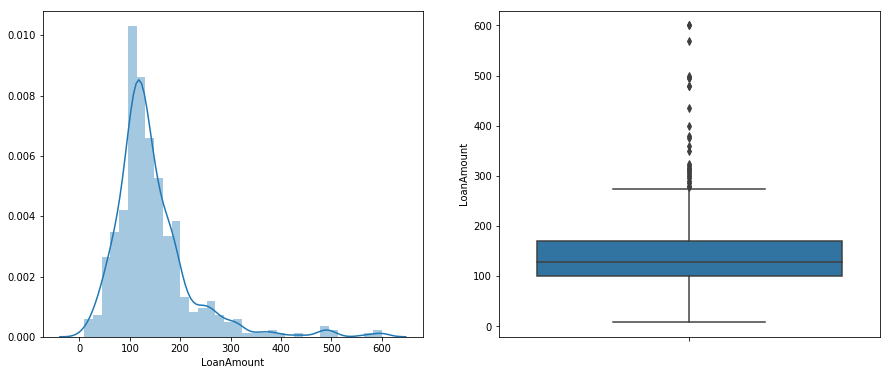

In [118]:
plt.figure(figsize=(15,6))
plt.figure(1)
plt.subplot(121)
sns.distplot(train_2['LoanAmount'])
plt.subplot(122)
sns.boxplot(y=train_2['LoanAmount'])
# LoanAmount

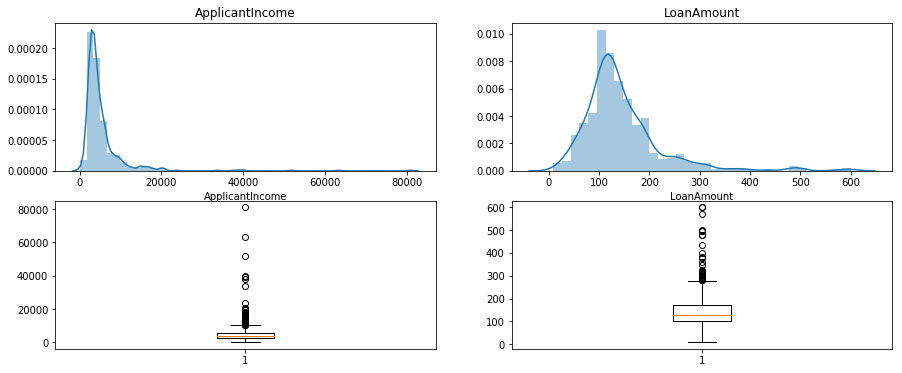

In [119]:
plt.figure(figsize=(15,6))
plt.figure(1)
plt.subplot(221)
sns.distplot(train_1['ApplicantIncome']).set_title("ApplicantIncome")
plt.subplot(222)
sns.distplot(train_2["LoanAmount"]).set_title("LoanAmount")
plt.subplot(223)
plt.boxplot(train['ApplicantIncome']) 
plt.subplot(224)
plt.boxplot(train_2['LoanAmount'])
plt.show()

# Desgine the hypotheses:::

People who have high income have higher chances to  get loan apporval.


People who are eudcated  have higher chances to  get loan apporval.

People who are less Loan amount have higher chances to  get loan   apporval.

people in urban have higher chances to  get loan apporval.

Less dependents have higher chances to  get loan apporval.

hight loan amount term have higher chances to  get loan apporval.

Male have higher chances to  get loan apporval.



Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


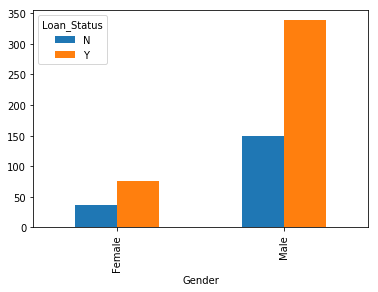

In [120]:
# Check the status of the apporved loan vs Gender
GenderVSLoan = pd.crosstab(train_1["Gender"],train_1['Loan_Status'])
print(GenderVSLoan)
GenderVSLoan.plot.bar()
plt.show()

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


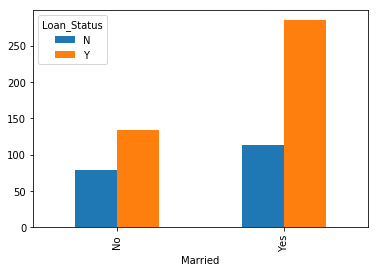

In [121]:
# Check the status of the apporved Married and Loan
MarriedVSLoan = pd.crosstab(train["Married"],train["Loan_Status"])
print(MarriedVSLoan)
MarriedVSLoan.plot.bar()
plt.show()

Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33


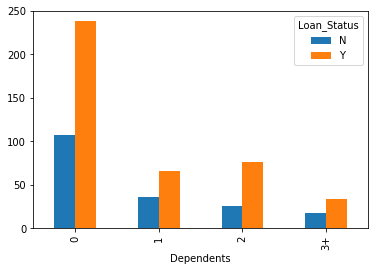

In [122]:
# Check the status of the apporved Dependent and Loan
DependentVSLoan = pd.crosstab(train['Dependents'],train['Loan_Status'])
print(DependentVSLoan)
DependentVSLoan.plot.bar()
plt.show()

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


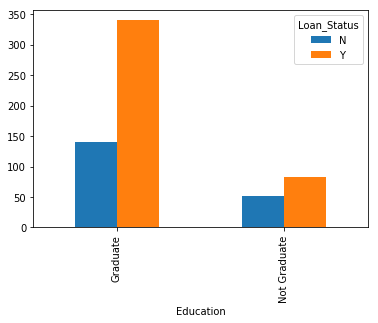

In [123]:
# Check the status of the apporved Education and Loan
EducationVSLoan = pd.crosstab(train['Education'],train['Loan_Status'])
print(EducationVSLoan)
EducationVSLoan.plot.bar()

Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56


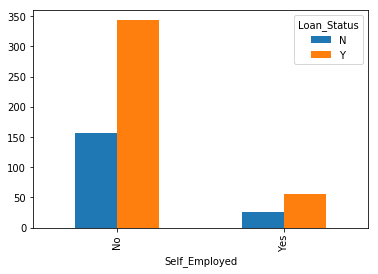

In [124]:
# Check the status of the apporved self employed and Loan
SelfVSLoan = pd.crosstab(train['Self_Employed'],train['Loan_Status'])
print(SelfVSLoan)
SelfVSLoan.plot.bar()

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


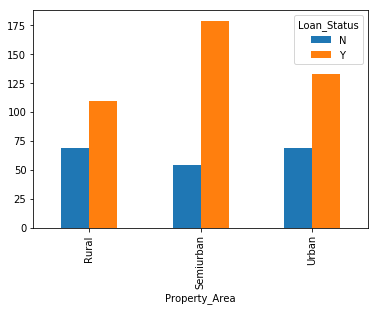

In [125]:
# Check the status of the apporved Property area and Loan
PropertyVSLoan = pd.crosstab(train['Property_Area'],train['Loan_Status'])
print(PropertyVSLoan)
PropertyVSLoan.plot.bar() 

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


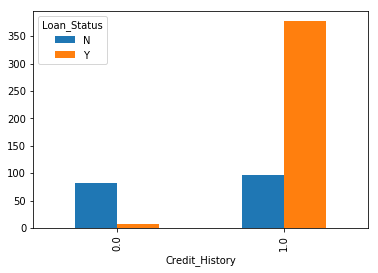

In [126]:
# Check the status of the apporved Credit_History and Loan
HistoryVSLoan = pd.crosstab(train['Credit_History'],train['Loan_Status'])
print(HistoryVSLoan)
HistoryVSLoan.plot.bar()

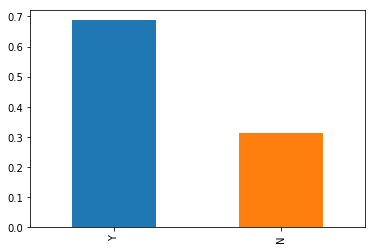

In [127]:
train_1['Loan_Status'].value_counts(True).plot.bar()

In [128]:
train_1['ApplicantIncome'].describe() 

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [129]:
train_2= train_1.copy()

Loan_Status       N    Y
LoanAmount_bin          
Low              47  107
Average         103  255
High             31   49


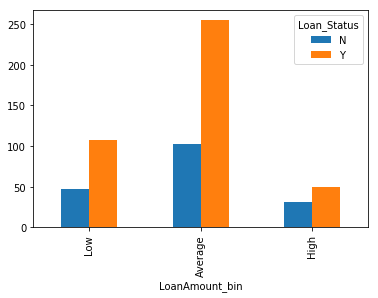

In [130]:
# Check the status of the apporved LoanAmount and Loan
bins=[0,100,200,700] 
group=['Low','Average','High'] 
train_2['LoanAmount_bin']=pd.cut(train_2['LoanAmount'],bins,labels=group)
AmountVSLoan = pd.crosstab(train_2['LoanAmount_bin'],train_2['Loan_Status'])
print(AmountVSLoan)
AmountVSLoan.plot.bar()

In [131]:
train_2['LoanAmount_bin'].head(10)

0        NaN
1    Average
2        Low
3    Average
4    Average
5       High
6        Low
7    Average
8    Average
9       High
Name: LoanAmount_bin, dtype: category
Categories (3, object): [Low < Average < High]

In [132]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [133]:
train_3 = train_1.copy()

In [134]:
print(id(train_3)),print(id(train_1))

139972672545064
139972674029552


(None, None)

In [135]:
train_3['Loan_Status'].head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

In [136]:
train_3['Loan_Status']=train_3['Loan_Status'].replace('Y',1)
train_3['Loan_Status']=train_3['Loan_Status'].replace('N',0)

# Missing value

In [137]:
train_3.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [138]:
# for numercial value, we can impute mean and median
# for categorical value, we can impute mode

In [139]:
train_3['Gender'].fillna(train['Gender'].mode()[0],inplace = True)
train_3['Married'].fillna(train['Married'].mode()[0],inplace = True)
train_3['Dependents'].fillna(train['Dependents'].mode()[0],inplace = True)
train_3['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace = True)
train_3['LoanAmount'].fillna(train['LoanAmount'].median(),inplace = True)

In [140]:
train_3['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [141]:
train_3['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace = True)

In [142]:
train_3['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [143]:
train_3['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace= True)

In [144]:
train_3.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

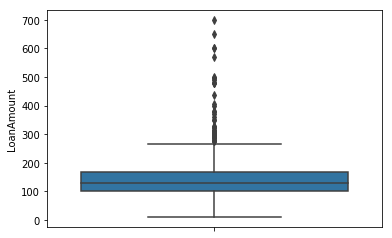

In [145]:
sns.boxplot(y=train['LoanAmount'])
plt.show()

In [146]:
train['LoanAmount'].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [147]:
train_3['LoanAmount'].head() 

0    128.0
1    128.0
2     66.0
3    120.0
4    141.0
Name: LoanAmount, dtype: float64

In [148]:
# Normialzie the Loan Amount due to outliners ( verified by .describe)
train_3['LoanAmount']=np.log(train_3['LoanAmount'])

In [149]:
train_3['LoanAmount'].describe()

count    614.000000
mean       4.857250
std        0.495996
min        2.197225
25%        4.607658
50%        4.852030
75%        5.104426
max        6.551080
Name: LoanAmount, dtype: float64

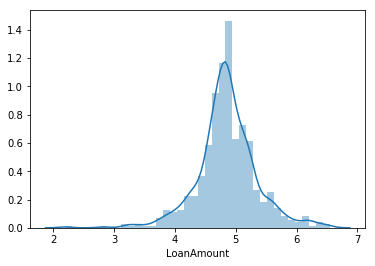

In [150]:
sns.distplot(train_3['LoanAmount'])
plt.show()

In [151]:
test_1.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [152]:
test_1['Gender'].fillna(test_1['Gender'].mode()[0],inplace = True)
test_1['Dependents'].fillna(test_1['Dependents'].mode()[0],inplace = True)
test_1['Self_Employed'].fillna(test_1['Self_Employed'].mode()[0],inplace = True)
test_1['LoanAmount'].fillna(test_1['LoanAmount'].median(),inplace = True)
test_1['Credit_History'].fillna(test_1['Credit_History'].mode()[0],inplace = True)
test_1['Loan_Amount_Term'].fillna(test_1['Loan_Amount_Term'].mode()[0],inplace = True)

# Model Building:

In [153]:
train_3.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,4.852030,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,4.852030,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,4.189655,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,4.787492,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,4.948760,360.0,1.0,Urban,1


In [154]:
# Remove the loan id from train and test becuase it don't have any significance
train_4= train_3.drop('Loan_ID',axis=1)
test_2= test_1.drop('Loan_ID',axis=1)

In [155]:
train_4.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,4.852030,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,4.852030,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,4.189655,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,4.787492,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,4.948760,360.0,1.0,Urban,1


In [156]:
test_2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [157]:
#Sklearn requires the target variable in a separate dataset. 
#So, we will drop our target variable from the train dataset and save it in another dataset.

X = train_4.drop('Loan_Status',1) 
y = train_4.Loan_Status

In [158]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,4.852030,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,4.852030,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,4.189655,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,4.787492,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,4.948760,360.0,1.0,Urban


# Logistic regression takes only input as numerical value, so we have to change all variable in numerical values.

In [159]:
X=pd.get_dummies(X) 
train_3=pd.get_dummies(train_3) 
test_2=pd.get_dummies(test_2)

In [160]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,4.852030,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,4.852030,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,4.189655,360.0,1.0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,4.787492,360.0,1.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,4.948760,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1


In [161]:
test_2.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
1,3076,1500,126.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
2,5000,1800,208.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
3,2340,2546,100.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
4,3276,0,78.0,360.0,1.0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1


In [162]:
X.shape

(614, 20)

In [163]:
y.shape

(614,)

Now we will train the model on training dataset and make predictions for the test dataset. But how will we validate these predictions? 

Is predictions correct or not ??


One way of doing this is we can divide our train dataset into two parts: train and validation.


We can train the model on this train part and using that make predictions for the validation part. In this way we can validate our predictions as we have the true predictions for the validation part (which we do not have for the test dataset).

In [164]:
# for spliting the data
from sklearn.model_selection import train_test_split

In [165]:
# The dataset has been divided into training and validation part. 
# cv = test = cross validation

x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

In [166]:
x_train.shape, x_cv.shape,y_train.shape

((429, 20), (185, 20), (429,))

In [167]:
# Let us import LogisticRegression and accuracy_score from sklearn and fit the logistic regression model.

from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

In [168]:
model = LogisticRegression()
model.fit(x_train,y_train)

/home/v-rishabh.gupta/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Here the C parameter represents inverse of regularization strength. Regularization is applying a penalty to increasing the magnitude of parameter values in order to reduce overfitting. 

Smaller values of C specify stronger regularization. 

In [169]:
# Let’s predict the Loan_Status for validation set and calculate its accuracy.
pred_cv= model.predict(x_cv)
print(pred_cv)

[1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1
 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 1]


In [170]:
# Let us calculate how accurate our predictions are by calculating the accuracy.
accuracy_score(y_cv,pred_cv)

0.7837837837837838

In [171]:
# Approxmately our model is almost 80% accurate 

In [172]:
# predictions for test data set
pred_test = model.predict(test_2)

In [173]:
os.listdir()

['logistic.csv',
 '.ipynb_checkpoints',
 'Loan Prediction .ipynb',
 'sample_submission_S7jWYrJ.csv',
 'test.csv',
 'train.csv']

In [174]:
# Lets import the submission file which we have to submit on the solution checker.

submission=pd.read_csv("sample_submission_S7jWYrJ.csv")

In [175]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,0
1,LP001022,0
2,LP001031,0
3,LP001035,0
4,LP001051,0


We only need the Loan_ID and the corresponding Loan_Status for the final submission. we will fill these columns with the Loan_ID of test dataset and the predictions that we made, i.e., pred_test respectively.


In [176]:
submission['Loan_Status']=pred_test 
submission['Loan_ID']= test_1['Loan_ID']

In [177]:
submission['Loan_Status'].describe()

count    367.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: Loan_Status, dtype: float64

In [178]:
submission['Loan_Status'].value_counts()

0    367
Name: Loan_Status, dtype: int64

In [179]:
# Remember we need predictions in Y and N. So let’s convert 1 and 0 to Y and N.

submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [180]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [181]:
# write the csv ( save the csv in local machine)
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')

Instead of creating validation set, we can also make use of cross validation to validate our predictions. We will learn about this technique in next section.

In [182]:
# Logistic Regression using stratified k-folds cross validation

To check how robust our model is to unseen data, we can use Validation. It is a technique which involves reserving a particular sample of a dataset on which you do not train the model. Later, you test your model on this sample before finalizing it. Some of the common methods for validation are listed below:

The validation set approach
k-fold cross validation
Leave one out cross validation (LOOCV)
Stratified k-fold cross validation
https://www.analyticsvidhya.com/blog/2018/05/improve-model-performance-cross-validation-in-python-r/

# stratified k-fold cross validation

Stratification is the process of rearranging the data so as to ensure that each fold is a good representative of the whole.

For example, in a binary classification problem where each class comprises of 50% of the data, it is best to arrange the data such that in every fold, each class comprises of about half the instances.

It is generally a better approach when dealing with both bias and variance.

A randomly selected fold might not adequately represent the minor class, particularly in cases where there is a huge class imbalance.

In [183]:
from sklearn.model_selection import StratifiedKFold
# Now let’s make a cross validation logistic model with 
# stratified 5 folds and make predictions for test dataset.


In [184]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))  


1 of kfold 5

1 of kfold 5

1 of kfold 5

1 of kfold 5

1 of kfold 5


In [185]:
xtr,xvl = X.loc[train_index],X.loc[test_index]     
ytr,yvl = y[train_index],y[test_index]         
model = LogisticRegression(random_state=1)     
model.fit(xtr, ytr)     

/home/v-rishabh.gupta/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [186]:
pred_test = model.predict(xvl)     
score = accuracy_score(yvl,pred_test)     
print('accuracy_score',score)     

accuracy_score 0.8278688524590164


In [187]:
i+=1 
pred_test = model.predict(test_2) 
pred=model.predict_proba(xvl)[:,1]

In [188]:
print(pred)

[0.78595728 0.70304735 0.29515611 0.84026304 0.30799027 0.17958603
 0.87148278 0.62343808 0.8142424  0.88994397 0.79215433 0.10457231
 0.74577585 0.1386829  0.86440947 0.86156817 0.64793848 0.79152407
 0.83050073 0.79153733 0.78127153 0.20748918 0.80901122 0.70415777
 0.74661206 0.92329824 0.69694511 0.67593418 0.76267237 0.34053536
 0.86760493 0.72057865 0.18543646 0.67825551 0.92968114 0.85242961
 0.81256231 0.84439438 0.69360381 0.80700944 0.88737321 0.84693256
 0.64533791 0.77164756 0.83135898 0.76493691 0.47702612 0.62116772
 0.85803391 0.59463586 0.84547915 0.26420921 0.83122927 0.65140544
 0.68202453 0.77165264 0.84356781 0.6316271  0.64953476 0.69681624
 0.91662925 0.0835818  0.71493921 0.8519641  0.84593732 0.88449917
 0.86470344 0.88894452 0.64117466 0.68846345 0.83987915 0.91238815
 0.67562604 0.66375367 0.67662104 0.79681922 0.26085179 0.81505666
 0.8370219  0.72170696 0.62730589 0.14436658 0.25526318 0.78134379
 0.15575469 0.51688392 0.88765456 0.64614845 0.80670782 0.6450

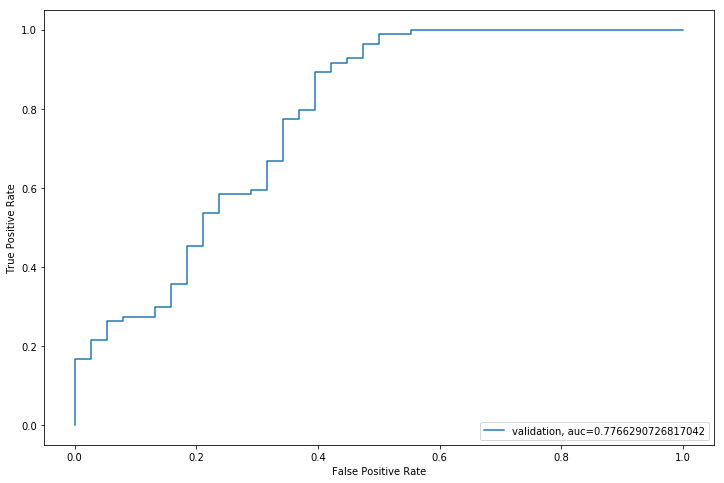

In [189]:
# The mean validation accuracy for this model turns out to be 0.81. Let us visualize the roc curve.

from sklearn import metrics 
fpr, tpr, _ = metrics.roc_curve(yvl,  pred)
auc = metrics.roc_auc_score(yvl, pred) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="validation, auc="+str(auc)) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

In [190]:
# We got an auc value of 0.77.

In [191]:
#Feature Engineering

#### Based on the domain knowledge, we can come up with new features that might affect the target variable. We will create the following three new features:

#### Total Income - Applicant Income + Coapplicant Income. If the total income is high, chances of loan approval might also be high.

#### EMI - EMI is the monthly amount to be paid by the applicant to repay the loan. People who have high EMI’s might find it difficult to pay back the loan. We can calculate the EMI by taking the ratio of loan amount with respect to loan amount term.

#### Balance Income - This is the income left after the EMI has been paid. Idea behind creating this variable is that if this value is high, the chances are high that a person will repay the loan and hence increasing the chances of loan approval.


In [193]:
train_3['Total_Income'] = train_3['ApplicantIncome']+train_3['CoapplicantIncome'] 
test_2['Total_Income'] =test_2['ApplicantIncome']+ train_2['CoapplicantIncome']

/home/v-rishabh.gupta/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


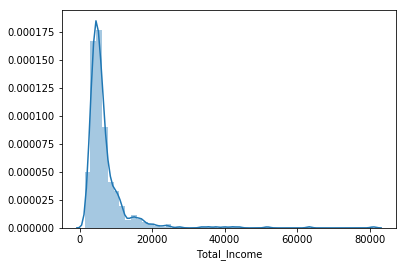

In [194]:
sns.distplot(train_3['Total_Income'])

We can see it is shifted towards left, i.e., the distribution is right skewed. So, let’s take the log transformation to make the distribution normal.

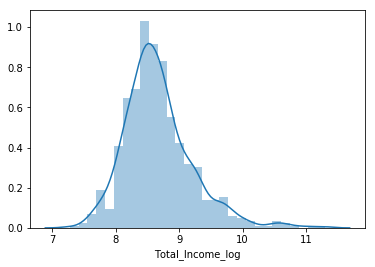

In [195]:
train_3['Total_Income_log']= np.log(train_3['Total_Income'])
sns.distplot(train_3['Total_Income_log'])

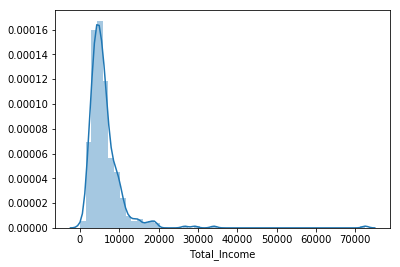

In [196]:
sns.distplot(test_2['Total_Income'])

In [197]:
test_2['Total_Income_log']= np.log(test_2['Total_Income'])

/home/v-rishabh.gupta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided.


In [198]:
# EMI 

train_3['EMI']=train_3['LoanAmount']/train_3['Loan_Amount_Term'] 
test_2['EMI']=test_2['LoanAmount']/test_2['Loan_Amount_Term']


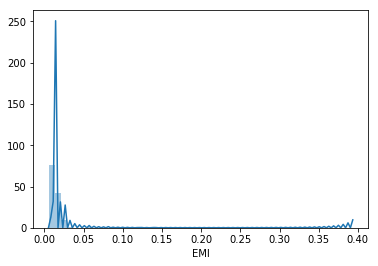

In [199]:
sns.distplot(train_3['EMI'])

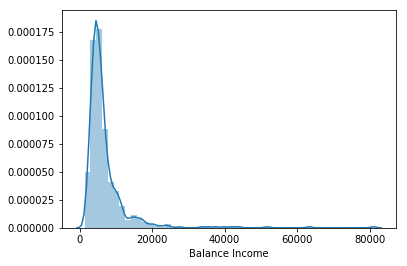

In [200]:
# Balance Income  the units equ
train_3['Balance Income']=train_3['Total_Income']-(train_3['EMI']*1000)
test_2['Balance Income']=test_2['Total_Income']-(test_2['EMI']*1000)
sns.distplot(train_3['Balance Income'])
plt.show()

Let us now drop the variables which we used to create these new features. Reason for doing this is, the correlation between those old features and these new features will be very high and logistic regression assumes that the variables are not highly correlated. We also wants to remove the noise from the dataset, so removing correlated features will help in reducing the noise too.

In [201]:
train_3=train_3.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1) 
test_2=test_2.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

In [202]:
train_3.head()

,Credit_History,Loan_Status,Loan_ID_LP001002,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,Loan_ID_LP001011,Loan_ID_LP001013,Loan_ID_LP001014,...,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income,Total_Income_log,EMI,Balance Income
0,1.0,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,5849.0,8.674026,0.013478,5835.522138
1,1.0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,6091.0,8.714568,0.013478,6077.522138
2,1.0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,3000.0,8.006368,0.011638,2988.362070
3,1.0,1,0,0,0,1,0,0,0,0,...,1,1,0,0,0,1,4941.0,8.505323,0.013299,4927.701412
4,1.0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,6000.0,8.699515,0.013747,5986.253445


# Model Building : 
After creating new features, we can continue the model building process. So we will start with logistic regression model and then move over to more complex models like RandomForest and XGBoost.

We will build the following models in this section.

Logistic Regression
Decision Tree
Random Forest
XGBoost

In [203]:
x= train_3.drop('Loan_Status',1)
y = train_3['Loan_Status']

In [204]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [205]:
# Logistic Regression
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
xtr,xvl = X.loc[train_index],X.loc[test_index]     
ytr,yvl = y[train_index],y[test_index]         


1 of kfold 5

1 of kfold 5

1 of kfold 5

1 of kfold 5

1 of kfold 5


In [206]:
model = LogisticRegression(random_state=1)     
model.fit(xtr, ytr)     
pred_test = model.predict(xvl)     
score = accuracy_score(yvl,pred_test)     
print('accuracy_score',score)     

accuracy_score 0.8278688524590164


/home/v-rishabh.gupta/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [208]:
print(pred)

[0.78595728 0.70304735 0.29515611 0.84026304 0.30799027 0.17958603
 0.87148278 0.62343808 0.8142424  0.88994397 0.79215433 0.10457231
 0.74577585 0.1386829  0.86440947 0.86156817 0.64793848 0.79152407
 0.83050073 0.79153733 0.78127153 0.20748918 0.80901122 0.70415777
 0.74661206 0.92329824 0.69694511 0.67593418 0.76267237 0.34053536
 0.86760493 0.72057865 0.18543646 0.67825551 0.92968114 0.85242961
 0.81256231 0.84439438 0.69360381 0.80700944 0.88737321 0.84693256
 0.64533791 0.77164756 0.83135898 0.76493691 0.47702612 0.62116772
 0.85803391 0.59463586 0.84547915 0.26420921 0.83122927 0.65140544
 0.68202453 0.77165264 0.84356781 0.6316271  0.64953476 0.69681624
 0.91662925 0.0835818  0.71493921 0.8519641  0.84593732 0.88449917
 0.86470344 0.88894452 0.64117466 0.68846345 0.83987915 0.91238815
 0.67562604 0.66375367 0.67662104 0.79681922 0.26085179 0.81505666
 0.8370219  0.72170696 0.62730589 0.14436658 0.25526318 0.78134379
 0.15575469 0.51688392 0.88765456 0.64614845 0.80670782 0.6450

In [ ]:
# The mean validation accuracy for this model turns out to be 0.81. Let us visualize the roc curve.

from sklearn import metrics 
fpr, tpr, _ = metrics.roc_curve(yvl,  pred)
auc = metrics.roc_auc_score(yvl, pred) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="validation, auc="+str(auc)) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

# Decision Tree

Decision tree is a type of supervised learning algorithm(having a pre-defined target variable) that is mostly used in classification problems. In this technique, we split the population or sample into two or more homogeneous sets(or sub-populations) based on most significant splitter / differentiator in input variables.

In [209]:
from sklearn import tree

In [210]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
xtr,xvl = X.loc[train_index],X.loc[test_index]     
ytr,yvl = y[train_index],y[test_index]         


1 of kfold 5

1 of kfold 5

1 of kfold 5

1 of kfold 5

1 of kfold 5


In [225]:
model = tree.DecisionTreeClassifier(random_state=1)
model.fit(xtr,ytr)
pred_test=model.predict(xvl)
score = accuracy_score(yvl,pred_test)     
print('accuracy_score',score)     

accuracy_score 0.7131147540983607


In [217]:
print(pred_test)

[0 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0
 1 1 0 1 1 1 0 0 0 1 0 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 0 1]


In [218]:
xvl.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
2,3000,0.0,4.189655,360.0,1.0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
4,6000,0.0,4.948760,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
7,3036,2504.0,5.062595,360.0,0.0,0,1,0,1,0,0,0,1,1,0,1,0,0,1,0
10,3200,700.0,4.248495,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
22,2600,1911.0,4.753590,360.0,0.0,0,1,0,1,1,0,0,0,0,1,1,0,0,1,0


In [219]:
xtr.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,4.852030,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,4.852030,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
3,2583,2358.0,4.787492,360.0,1.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
5,5417,4196.0,5.587249,360.0,1.0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1
6,2333,1516.0,4.553877,360.0,1.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1


In [220]:
ytr.head()

0    1
1    0
3    1
5    1
6    1
Name: Loan_Status, dtype: int64

In [221]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

In [222]:
model = RandomForestClassifier(random_state=1, max_depth=10)     
model.fit(xtr, ytr)     
pred_test = model.predict(xvl)     
score = accuracy_score(yvl,pred_test)     
print('accuracy_score',score)     

accuracy_score 0.819672131147541


/home/v-rishabh.gupta/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [223]:
# XGBOOST
from xgboost import XGBClassifier

In [224]:
model = XGBClassifier(n_estimators=50, max_depth=4)     
model.fit(xtr, ytr)     
pred_test = model.predict(xvl)     
score = accuracy_score(yvl,pred_test)     
print('accuracy_score',score)     

accuracy_score 0.8114754098360656
